# Simulazione 2022 09 08

## Teoria

1. Che cos’è l’istogramma di un’immagine digitale? A cosa può servire?

L'istogramma di un'immagine ci permette di conoscere il numero di pixel per ogni tonalità di colore, più in particolare nelle immagini gray scale ci può permettere di avere un'idea della distribuzione dei valori dei pixel, siccome per ogni tonalità di grigio avremo il numero totale di pixel con quel valore. L'istogramma ci permette di capire la quantità di contrasto dell'immagine, quanto è luminosa un'immagine ed inoltre ci può fornire un primo strumento di separazione degli oggetti dallo sfondo. 

2. Definire formalmente i seguenti termini nel contesto della topologia digitale: vicini, percorso, componente connessa.

Nella topologia digitale definiamo:
* "vicini": i vicini di 'p', sono tutti i pixel aventi distanza unitaria da 'p'
* "percorso": un percorso di lunghezza n, dal pixel p al pixel q, è l'insieme dei pixel, tale che in accordo con la metrica selezionata, p_i è un vicino di p_i+1, con 0 <= i < n
* "componente connessa": è un sottoinsieme di F (o F*), tale che presi due pixel appartenenti alla componente connessa, esiste un percorso che li unisce, a seconda della metrica selezionata

3. Descrivere i filtri di Sobel e illustrarne brevemente alcune possibili applicazioni.

Il filtro di Sobel, è un filtro che viene utilizzato nel processo di "edge detection", più in particolare tale filtro è un filtro derivativo, attraverso il filtro Sobel è possibile calcolare solamente una derivata alla volta, quindi non posso calcolare la derivata di X e Y contemporaneamente. Per funzionare tale filtro necessita di un operazione di smooth, in quanto bisogna pulire l'immagine dal rumore. Tra tutti i filtri derivativi in circolazione, quello di Sobel è sicuramente il più utilizzato, il filtro è pseudo gaussiano, l'unico svantaggio per tale filtro è la non gestione accurata degli angoli a differenza di Sharr il quale ha la miglior varianza rotazionale. 

## Pratica

1. Convertire img in grayscale memorizzando il risultato in un’immagine chiamata gray_img.

2. Applicare due filtri gaussiani a gray_img: il primo con dimensione 5×5 e σ=1, il secondo con
dimensione 11×11 e σ=4. Siano img_g1 e img_g2, rispettivamente, le due immagini ottenute
applicando tali filtri.

3. Calcolare la differenza pixel-a-pixel sottraendo img_g2 da img_g1, memorizzando il risultato
in un’immagine con un intero a 16 bit per ogni pixel (in modo da ottenere sia i valori
negativi che quelli positivi), quindi conservare solo i valori positivi (ponendo a zero tutti
gli altri), normalizzarli fra 0 e 255 e memorizzare il risultato in un’immagine di byte img_d.

4. Eseguire l’algoritmo di Canny, senza effettuare il primo passo (smooth Gaussiano), ma partendo
direttamente dall’immagine img_g2; come soglie per l’isteresi utilizzare 30 e 70.

5. Restituire un’immagine a colori in cui, per ciascun pixel, la componente blu è il valore
corrispondente in gray_img, la componente verde è il valore corrispondente ottenuto con
l’algoritmo di Canny e la componente rossa è il valore corrispondente in img_d.

In [2]:
import numpy as np
import cv2 as cv
import va

In [70]:
def esercizio(img):
    # Parte 1
    gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Parte 2
    img_g1 = cv.GaussianBlur(gray_img, (5,5), 1, None)
    img_g2 = cv.GaussianBlur(gray_img, (11,11), 4, None)
    # Parte 3
    diff = (img_g1.astype(np.int16) - img_g2)
    diff[diff < 0] = 0
    img_d = cv.normalize(diff, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)
    # Parte 4
    canny = cv.Canny(img_g2, 30, 70)
    # Parte 5

    return cv.merge((gray_img, canny, img_d))
    

In [69]:
def esercizio_ottimo(img):
    # Parte 1
    gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Parte 2
    img_g1 = cv.GaussianBlur(gray_img, (5,5), 1, None)
    img_g2 = cv.GaussianBlur(gray_img, (11,11), 4, None)
    # Parte 3
    diff = img_g1.astype(np.int16) - img_g2
    img_d = np.clip(diff, 0, 255).astype(np.uint8)
    img_d = cv.normalize(img_d, None, 0, 255, cv.NORM_MINMAX)
    # Parte 4
    img_c = cv.Canny(img_g2, 30, 70)
    # Parte 5
    return cv.merge((gray_img, img_c, img_d))

""
""

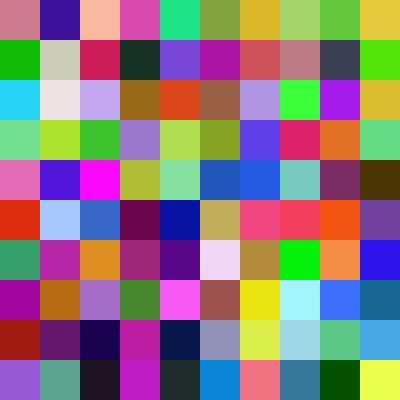

In [33]:
img = np.random.randint(0, 255, (10, 10, 3), dtype=np.uint8)
va.show(img)

,
,

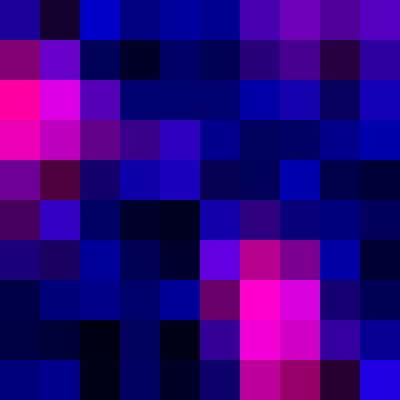
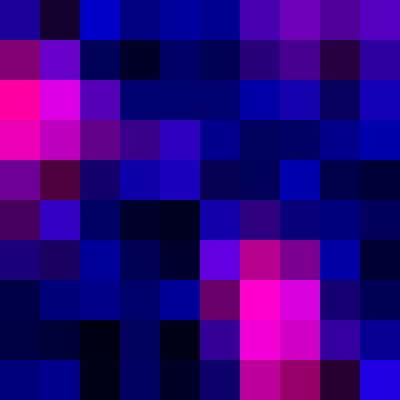

In [71]:
bgr = esercizio(img)
bgr2 = esercizio_ottimo(img)
va.show(bgr, bgr2)